In [1]:
import os
from ultralytics import YOLO
import math
import cv2

# Load a model
#model = YOLO("yolov8n.pt")  # build a new model from scratch

# Use the model
#results = model.train(data="config.yaml", epochs=25)  # train the model

In [2]:
#model('D:/heisen/IITM studies/3rd year/sem 6/ID4900/data__/data/images/test/download.jpeg')
model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')
img_path = 'D:/heisen/IITM studies/3rd year/sem 6/ID4900/data__/data/images/test/WIN_20240322_18_17_11_Pro.jpg'
model = YOLO(model_path)
results = model([img_path])  # return a list of Results objects



0: 384x640 1 pushrim, 2 castors, 100.3ms
Speed: 5.0ms preprocess, 100.3ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)


In [7]:
# push_rim_id = 0
# pixel_count = 1600
# fov = 68
# for result in results:
#     for box in result.boxes:
#         if box.cls == push_rim_id:
#             height = box.xyxy[0][3].item() - box.xyxy[0][1].item()
#             width = box.xyxy[0][2].item() - box.xyxy[0][0].item()
#             if width > height:
#                 width = height
#             dist_pixel = 24*2.54/height
#             half_len = dist_pixel*pixel_count/2
#             dist = half_len/math.tan(math.radians(fov/2))
#             alpha = math.degrees(math.acos(width/height))
#             print("height:", height, "width:", width, "alpha:", alpha, "dist(m):", dist/100)
            
#     result.show()  # display on screen

### FOR IMAGES

In [22]:

# push_rim_id = 0
# pixel_count = 1600
# fov = 68
# for result in results:
#     for box in (result.boxes):
#          if(box.cls == 0):
           
#             center_x = box.xywh[0][0].item()
#             center_y = box.xywh[0][1].item()
#             width = box.xywh[0][2].item()
#             height = box.xywh[0][3].item()
            
#             if(width > height):
#                width = height
#             orientation = math.degrees(math.acos(width/height))

#             pixel_dist = 24*2.54/height
#             half_len = pixel_dist*pixel_count/2
#             dist = half_len/math.tan(math.radians(fov/2))

#             angle = math.degrees(math.atan((center_x - pixel_count/2)/pixel_count))
#             print("dist(m): ", dist, "angle(deg): ", angle)

# Read the image
push_rim_id = 0
fov = 68
image = cv2.imread(img_path)
pixel_count = image.shape[1]
print(pixel_count)


# Iterate over the results
for result in results:
    for box in result.boxes:
        if box.cls == push_rim_id:
            center_x = box.xywh[0][0].item()
            center_y = box.xywh[0][1].item()
            width = box.xywh[0][2].item()
            height = box.xywh[0][3].item()

            if width > height:
                width = height
            orientation = math.degrees(math.acos(width / height))

            pixel_dist = 24 * 2.54 / height
            half_len = pixel_dist * pixel_count / 2
            dist = half_len / math.tan(math.radians(fov / 2))

            angle = math.degrees(math.atan(pixel_dist*(center_x - pixel_count / 2) / dist))

            # Draw bounding box
            cv2.rectangle(image, (int(center_x - width / 2), int(center_y - height / 2)),
                          (int(center_x + width / 2), int(center_y + height / 2)), (0, 255, 0), 2)

            # Write distance and angle on top of the bounding box
            cv2.putText(image, f"dist(cm): {dist:.2f}, angle(deg): {angle:.2f}, orient(deg): {orientation:.2f}",
                        (int(center_x - width / 2), int(center_y - height / 2 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image
cv2.imshow("Image with Bounding Box", image)
cv2.imwrite("output_image.jpg", image)

cv2.waitKey(0)
cv2.destroyAllWindows()
            

1280

### FOR VIDEO

1280

0: 384x640 1 pushrim, 1 castor, 49.8ms
Speed: 0.0ms preprocess, 49.8ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 52.8ms
Speed: 0.0ms preprocess, 52.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 54.7ms
Speed: 1.0ms preprocess, 54.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 54.5ms
Speed: 0.0ms preprocess, 54.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 43.7ms
Speed: 6.4ms preprocess, 43.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 52.0ms
Speed: 0.0ms preprocess, 52.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 51.0ms
Speed: 2.7ms preprocess, 51.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pushrim, 1 castor, 58.

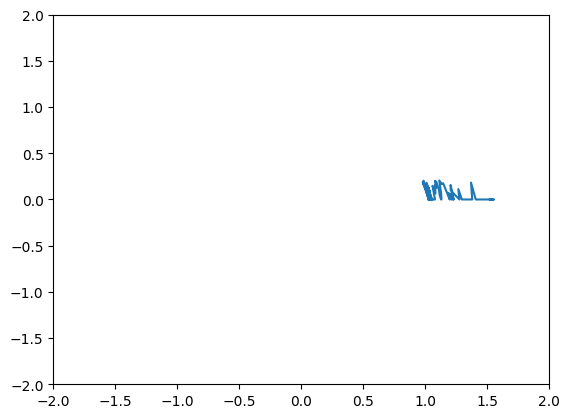

In [25]:
import matplotlib.pyplot as plt
import numpy as np
push_rim_id = 0
fov = 68
VIDEOS_DIR = os.path.join('.', 'videos')

video_path = os.path.join(VIDEOS_DIR, 'wheelchair4.mp4')
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
print(W)
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5
x_data = []
y_data = []
dist_arr = []
orient_arr = []
while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            # cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
            #             cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
            if class_id == push_rim_id:
                center_x = (x2+x1)/2
                center_y = (y2+y1)/2
                width = (x2-x1)/2
                height = (y2-y1)/2

                if width > height:
                    width = height
                orientation = math.degrees(math.acos(width / height))

                pixel_dist = 24 * 2.54 / height
                half_len = pixel_dist * W / 4 #why coming double, temporary adjusted by dividing by 4, ideally shld be 2
                dist = half_len / math.tan(math.radians(fov / 2))

                angle = math.degrees(math.atan(pixel_dist*(center_x - W / 2) / dist))
                
                cv2.putText(frame, f"dist(cm): {dist:.2f}",
                        (int(center_x - width / 2), int(center_y - height / 2 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.putText(frame, f"angle(deg): {angle:.2f}",
                        (int(center_x - width / 2), int(center_y - height / 2 - 40)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 1, cv2.LINE_AA)
                cv2.putText(frame, f"orient(deg): {orientation:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 70)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 1, cv2.LINE_AA)

                # Initialize empty lists for x and y coordinates
                dist_arr.append(dist)
                orient_arr.append(orientation)
                x_data.append(abs(dist)*math.cos(math.radians(orientation))/100)
                y_data.append(abs(dist)*math.sin(math.radians(orientation))/100)

                # Show the plot
                plt.show()

    out.write(frame)
    ret, frame = cap.read()
plt.plot(x_data, y_data)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

cap.release()
out.release()
cv2.destroyAllWindows()
            

In [20]:
has_value_less_than_90 = any(value < 90 for value in dist_arr)
print(has_value_less_than_90)
print(orient_arr)


False
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.60601721684942, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.056016469609069, 0.0, 4.650581142784402, 7.435424264324517, 0.0, 3.056564449481974, 0.0, 0.0, 2.2142662042239656, 3.5046045040389227, 0.0, 8.767202893630781, 8.292519816931595, 10.497270800718823, 3.0158374861293105, 0.0, 0.0, 0.0, 2.491703844825523, 5.127879829322548, 10.069474858357104, 9.68891058771

### FOR LIVE STREAM

In [6]:
push_rim_id = 0
fov = 68

# Open the video capture device (USB attached camera)
cap = cv2.VideoCapture(1)

# Get the frame width and height
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to write the output frames
out = cv2.VideoWriter('live_stream_out.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (W, H))

model_path = './runs/detect/train/weights/last.pt'

# Load the YOLO model
model = YOLO(model_path)

threshold = 0.5

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    if not ret:
        break

    # Detect objects in the frame using the YOLO model
    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            if class_id == push_rim_id:
                center_x = (x2 + x1) / 2
                center_y = (y2 + y1) / 2
                width = (x2 - x1) / 2
                height = (y2 - y1) / 2

                if width > height:
                    width = height
                orientation = math.degrees(math.acos(width / height))

                pixel_dist = 24 * 2.54 / height
                half_len = pixel_dist * W / 2
                dist = half_len / math.tan(math.radians(fov / 2))

                angle = math.degrees(math.atan(pixel_dist*(center_x - W / 2) / dist))

                cv2.putText(frame, f"dist(cm): {dist:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3, cv2.LINE_AA)
                cv2.putText(frame, f"angle(deg): {angle:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 40)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3, cv2.LINE_AA)
                cv2.putText(frame, f"orient(deg): {orientation:.2f}",
                            (int(center_x - width / 2), int(center_y - height / 2 - 70)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 3, cv2.LINE_AA)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame
    cv2.imshow('Live Stream', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and video writer objects
cap.release()
out.release()

# Destroy all windows
cv2.destroyAllWindows()


In [ ]:
# import os
# import cv2


# VIDEOS_DIR = os.path.join('.', 'videos')

# video_path = os.path.join(VIDEOS_DIR, 'wheelchair2.mp4')
# video_path_out = '{}_out.mp4'.format(video_path)

# cap = cv2.VideoCapture(video_path)
# ret, frame = cap.read()
# H, W, _ = frame.shape
# out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# # Load a model
# model = YOLO(model_path)  # load a custom model

# threshold = 0.5

# while ret:

#     results = model(frame)[0]

#     for result in results.boxes.data.tolist():
#         x1, y1, x2, y2, score, class_id = result

#         if score > threshold:
#             cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
#             cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

#     out.write(frame)
#     ret, frame = cap.read()

# cap.release()
# out.release()
# cv2.destroyAllWindows()


0: 640x640 1 pushrim, 1 castor, 155.5ms
Speed: 8.3ms preprocess, 155.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pushrim, 1 castor, 128.6ms
Speed: 0.0ms preprocess, 128.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pushrim, 1 castor, 122.7ms
Speed: 8.2ms preprocess, 122.7ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pushrim, 1 castor, 122.9ms
Speed: 8.9ms preprocess, 122.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pushrim, 1 castor, 118.0ms
Speed: 6.7ms preprocess, 118.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pushrim, 1 castor, 129.9ms
Speed: 0.0ms preprocess, 129.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pushrim, 1 castor, 121.8ms
Speed: 2.5ms preprocess, 121.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pushrim, 1 ca

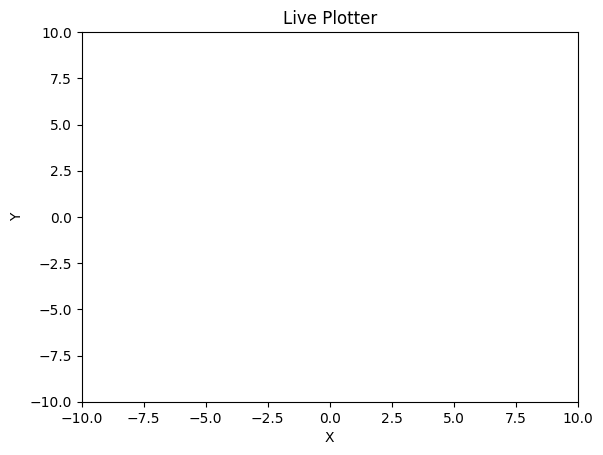

In [7]:
from matplotlib.animation import FuncAnimation
import random
import matplotlib.pyplot as plt
# Create a figure and axis

